### Problem Statement

Exercise: You are a software company selling predictions to the other software companies as an Api. The subscribers will use Apis to interact with your service.

Develop a model to predict the likelihood of a customer returning to the departmental store, and the likelihood of them buying the same product/service, also recommend the products that will increase the store revenue.

### Abstract

According to the assingment, I developed a machine learning model to predict the likelihood of a customer returning to a departmental store and the likelihood of them buying the same product or service. Additionally, we aimed to recommend products that could increase the store's revenue. The dataset used, "online_shoppers_intention.csv," comprised various features, including visitor behavior, page interactions, and transaction details.

The data underwent several preprocessing steps, including handling missing values, encoding categorical variables, and scaling numerical features. Two primary models were trained: one to predict customer return likelihood and another to predict repeat purchases of the same product or service. These models were evaluated using metrics such as accuracy, ROC-AUC, and classification reports.

To enhance the recommendations and identify products that could boost revenue, implemented a collaborative filtering recommendation system using the Surprise library. This system provided personalized product recommendations based on user-item interaction matrices.We also performed extensive data visualization to gain deeper insights into the dataset. Key visualizations included:

Distribution of Target Variable: A bar chart showing the count of sessions with and without revenue generation.
Correlation Heatmap: A heatmap illustrating the relationships between numerical features.
Pair Plot for Numerical Features: Scatter plots showcasing the distribution of numerical features across the revenue classes.
Revenue by Month: A bar chart displaying revenue generation across different months.
Revenue by Visitor Type: A bar chart depicting revenue generation by different visitor types.
Visitor Type Proportion: A pie chart highlighting the proportion of returning versus new visitors.

Performed extensive data visualization to gain deeper insights into the dataset. Key visualizations included:

* Distribution of Target Variable: A bar chart showing the count of sessions with and without revenue generation.
* Correlation Heatmap: A heatmap illustrating the relationships between numerical features.
* Pair Plot for Numerical Features: Scatter plots showcasing the distribution of numerical features across the revenue classes.
* Revenue by Month: A bar chart displaying revenue generation across different months.
* Revenue by Visitor Type: A bar chart depicting revenue generation by different visitor types.
* Visitor Type Proportion: A pie chart highlighting the proportion of returning versus new visitors.

This findings indicate significant patterns in visitor behavior and product interactions, which can be leveraged to enhance marketing strategies and customer retention efforts. The models and recommendations developed in this study provide actionable insights that can help departmental stores optimize their operations and increase revenue.

### About DataSet

The dataset "online_shoppers_intention.csv" is sourced from an online retail store and is designed to understand the purchasing intentions of users. The dataset contains various features that capture user behavior, session details, and transaction information. Below is a detailed description of the dataset and its key attributes:

* Administrative: This feature indicates the number of pages related to administrative tasks that the user visited. It captures the interaction with the administrative section of the website.

* Administrative_Duration: This feature represents the total amount of time (in seconds) that a user spent on administrative pages.

* Informational: This feature indicates the number of informational pages that the user visited during the session. These pages are typically related to general information about the store or products.

* Informational_Duration: This feature represents the total amount of time (in seconds) that a user spent on informational pages.

* ProductRelated: This feature indicates the number of pages related to specific products that the user visited. It captures the interaction with product pages.

* ProductRelated_Duration: This feature represents the total amount of time (in seconds) that a user spent on product-related pages.

* BounceRates: This feature indicates the percentage of visitors who enter the site and then leave ("bounce") rather than continuing to view other pages within the same site.

* ExitRates: This feature indicates the percentage of visitors who exit from the site after viewing a particular page.

* PageValues: This feature represents the average value of a web page that a user visited before completing an e-commerce transaction.

* SpecialDay: This feature indicates the closeness of the site visit to a special day (e.g., holidays, promotions). It is scaled from 0 (not close) to 1 (very close).

* Month: This categorical feature represents the month during which the session occurred. It is used to capture seasonality effects.

* OperatingSystems: This categorical feature indicates the operating system used by the visitor during the session.

* Browser: This categorical feature indicates the browser used by the visitor during the session.

* Region: This categorical feature indicates the geographic region from which the session originated.

* TrafficType: This categorical feature indicates the type of traffic source that led to the session (e.g., direct, referral, organic search).

* VisitorType: This categorical feature indicates whether the visitor is a returning visitor or a new visitor.

* Weekend: This boolean feature indicates whether the session occurred on a weekend.

* Revenue: This binary feature indicates whether the session resulted in a revenue-generating transaction (1) or not (0).

The dataset provides a comprehensive view of user interactions with the online store, encompassing both behavioral and transactional attributes. By analyzing these features, we aim to predict customer return likelihood, repeat purchase behavior, and recommend products to maximize store revenue. The dataset's rich feature set enables the development of robust predictive models and recommendation systems, contributing to effective customer retention strategies and revenue optimization for the store.

In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

In [141]:
df = pd.read_csv("online_shoppers_intention.csv")

In [142]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [180]:
df.shape

(12330, 20)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [145]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### lets Perform some EDA

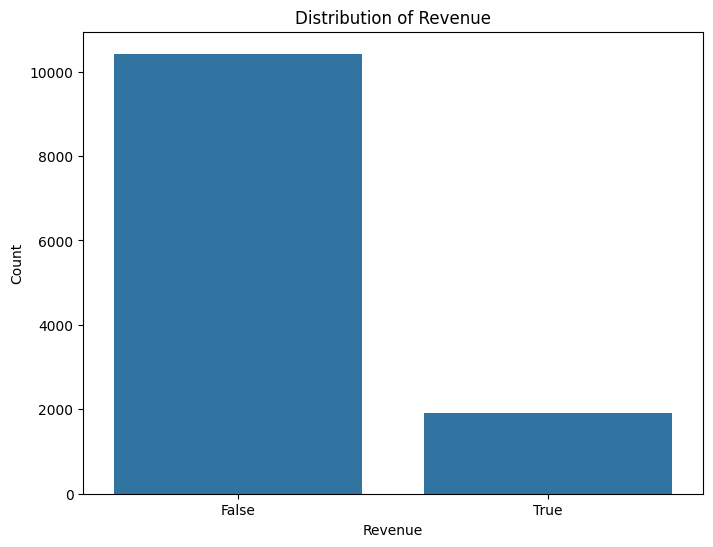

In [146]:
# 1. Distribution of Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Revenue', data=df)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()

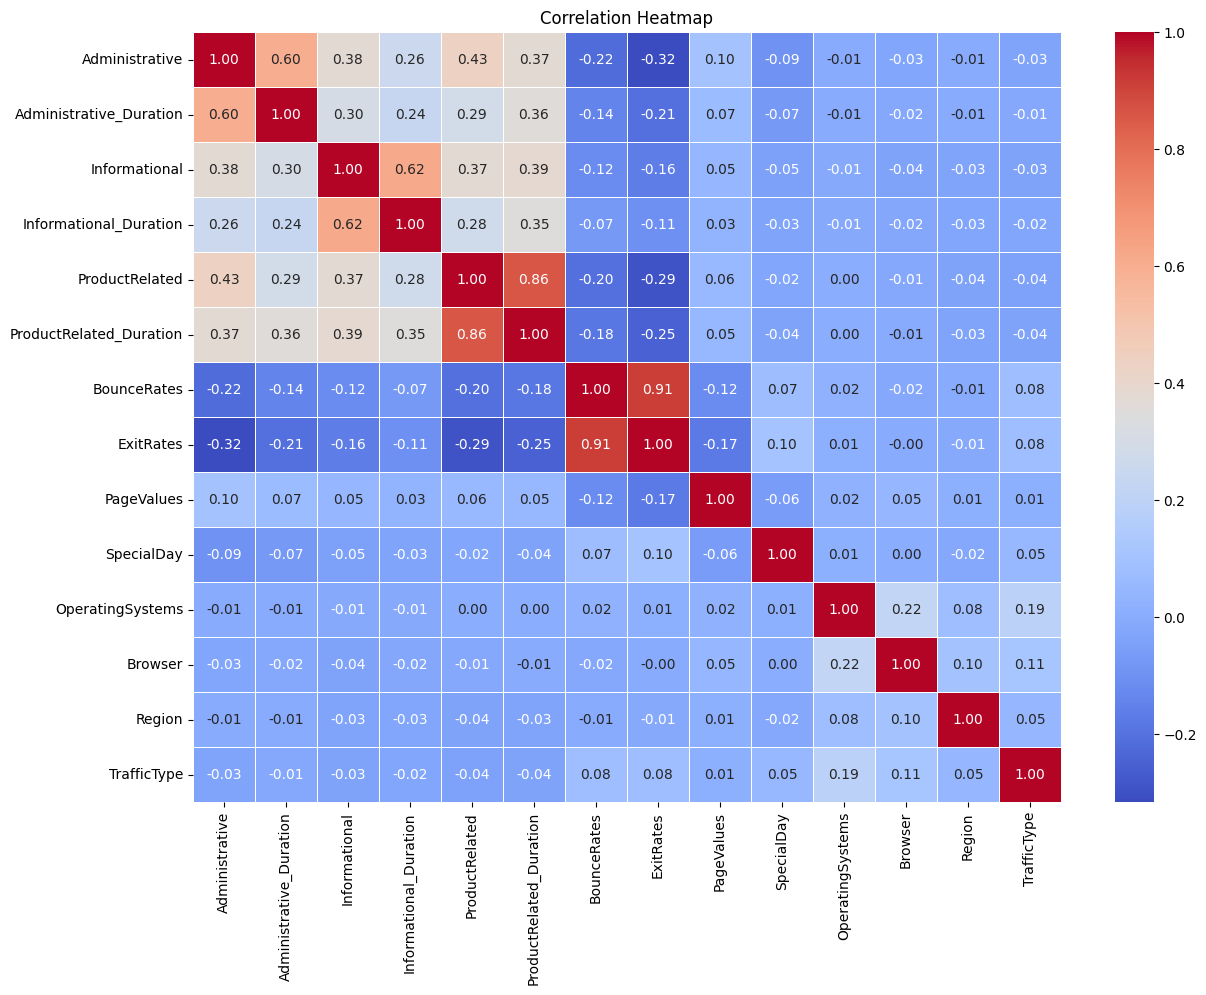

In [149]:
# 2. Correlation Heatmap
plt.figure(figsize=(14, 10))
numeric_df = df.select_dtypes(include=[float, int])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

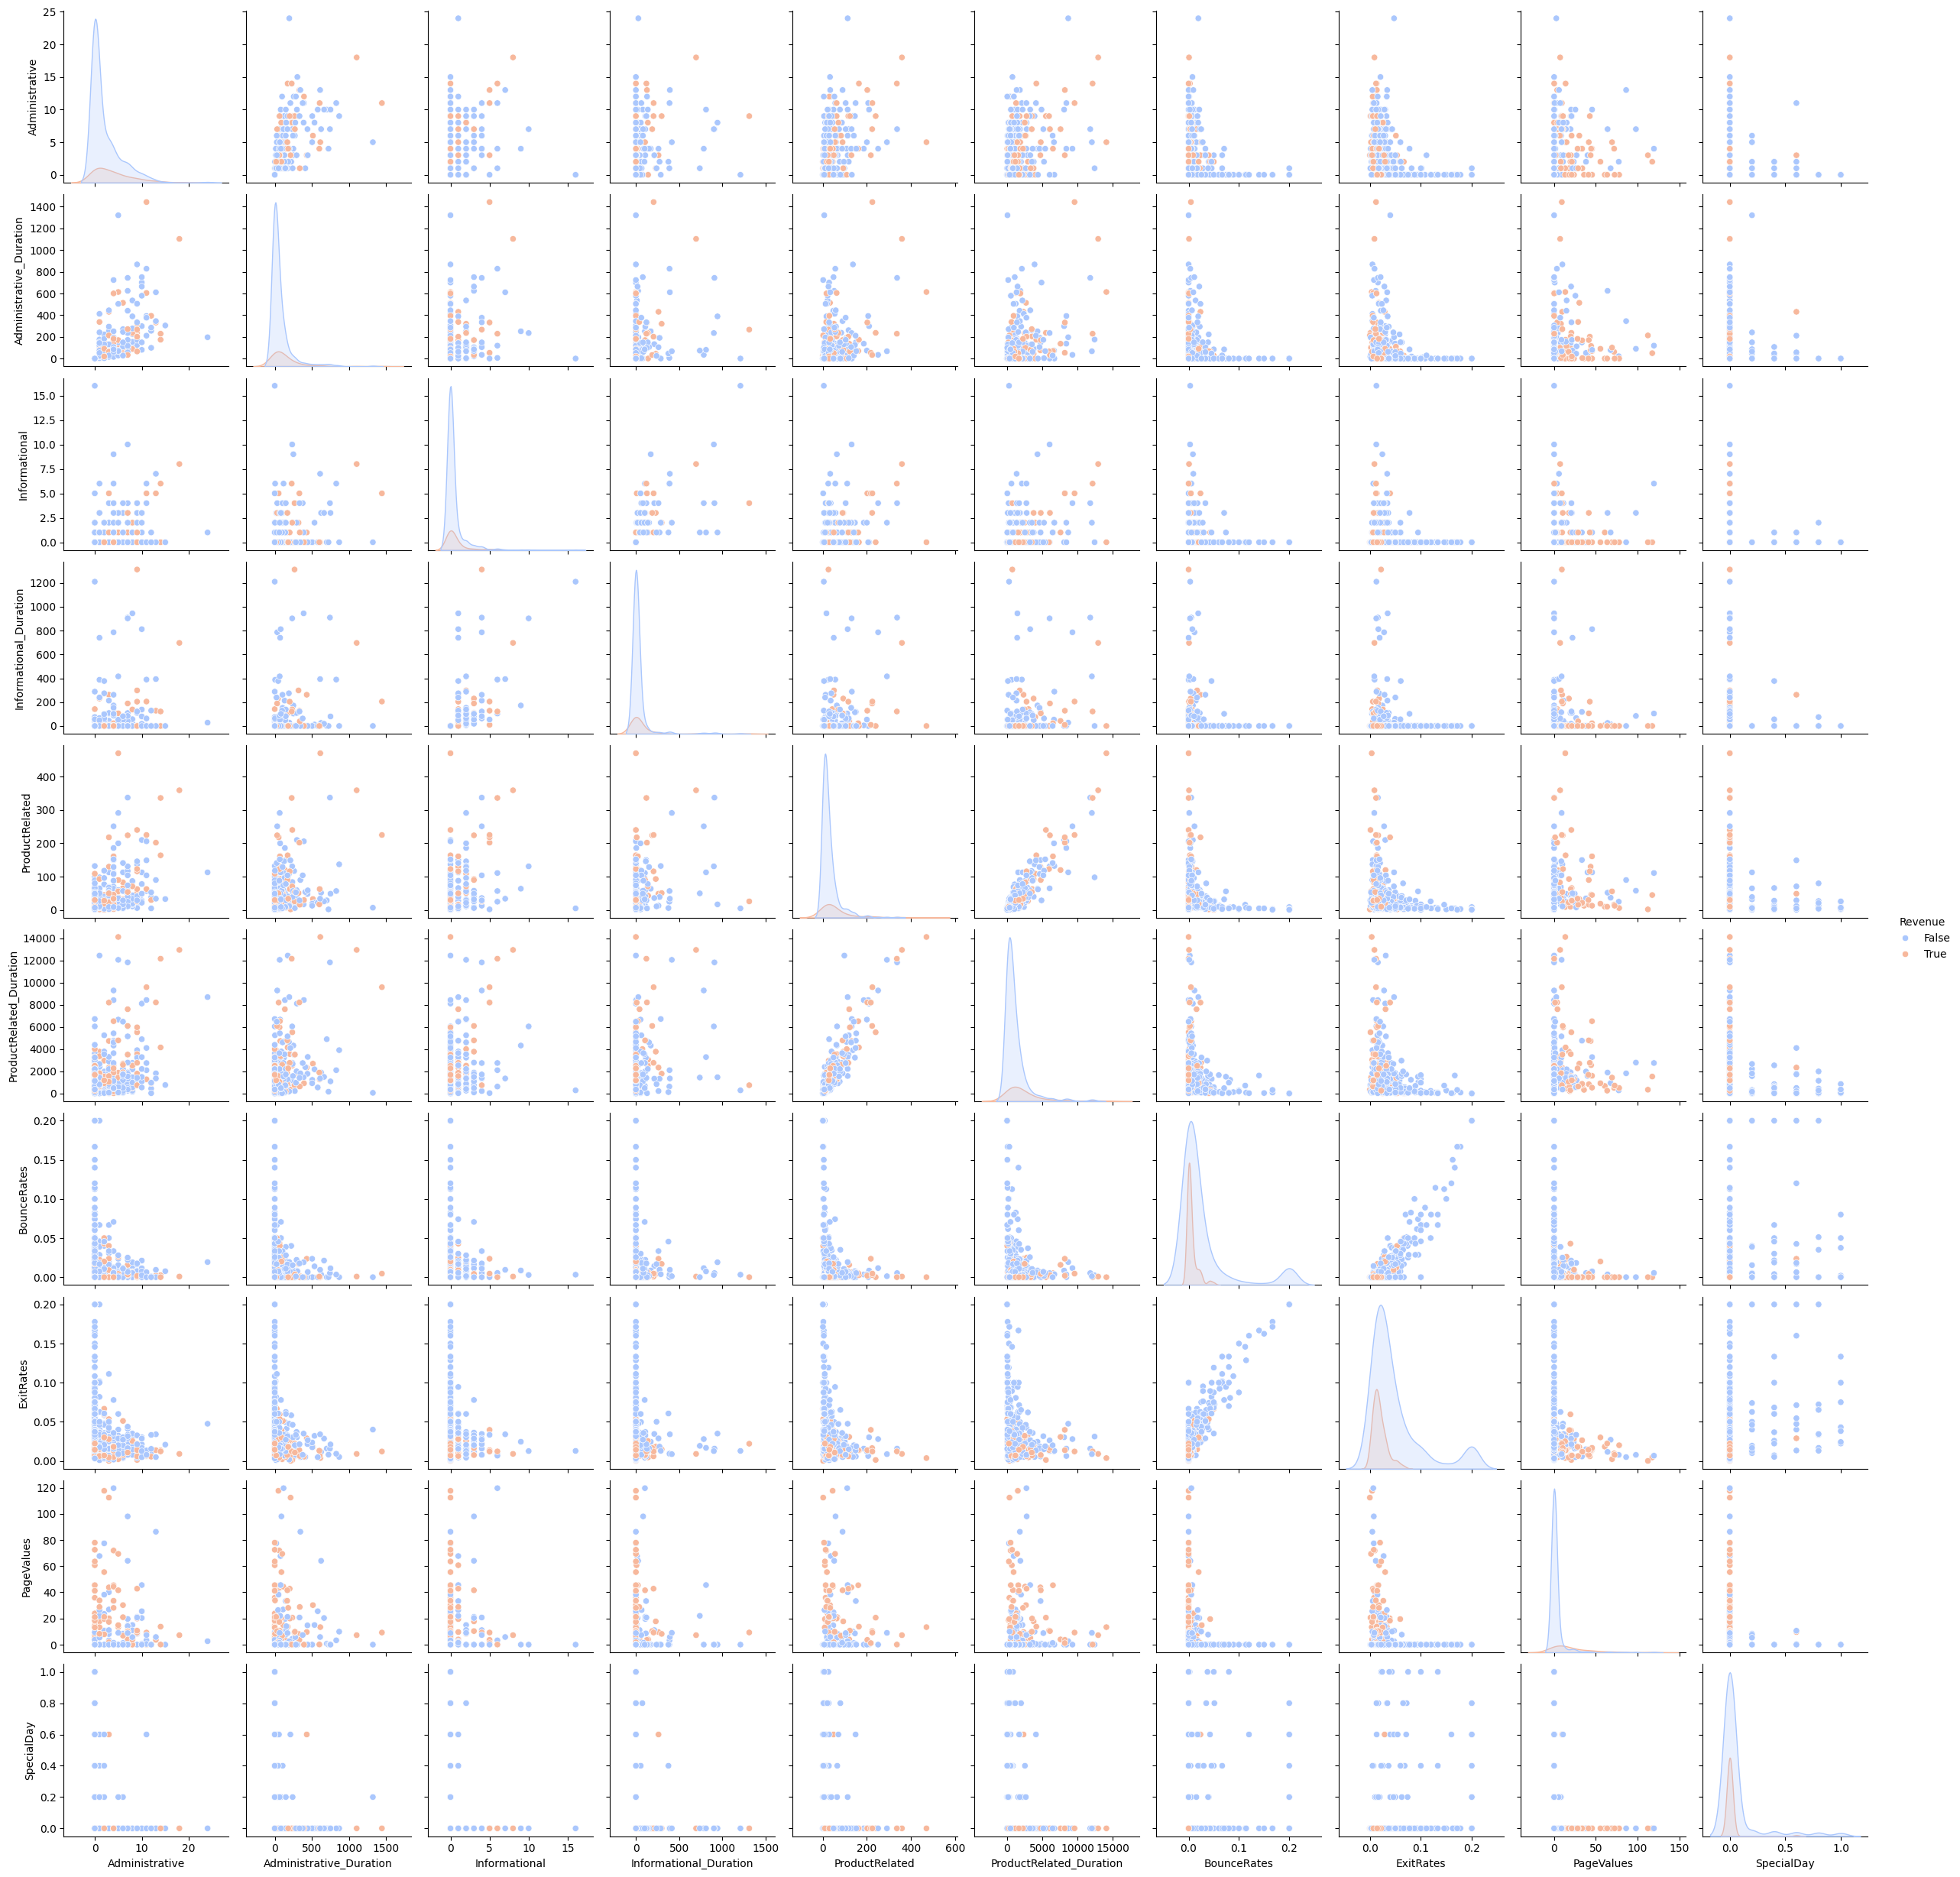

In [148]:
# 3. Pair Plot for Numerical Features
sample_data = df.sample(500)  # Sample data for better visualization
numerical_sample = sample_data[numerical_features + ['Revenue']]
sns.pairplot(numerical_sample, hue='Revenue', palette='coolwarm', diag_kind='kde')
plt.show()

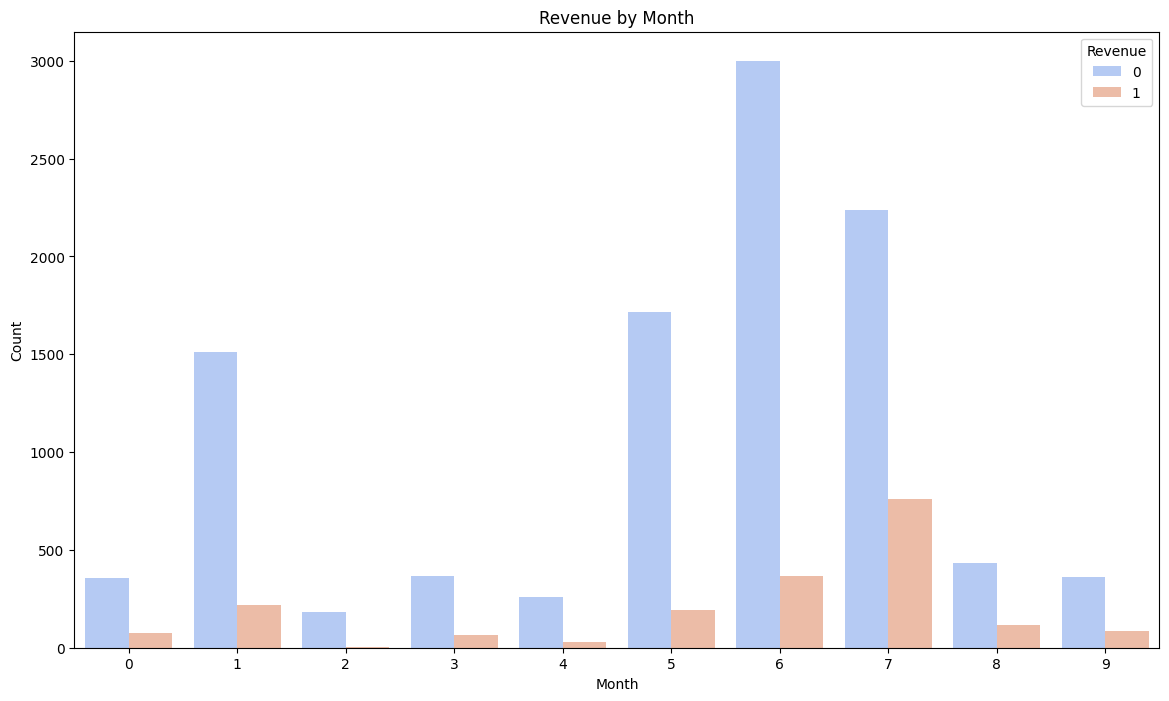

In [114]:
# 4. Revenue by Month
plt.figure(figsize=(14, 8))
df['Month_encoded'] = df['Month'].astype('category').cat.codes
sns.countplot(x='Month_encoded', hue='Revenue', data=df, palette='coolwarm')
plt.title('Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Revenue', loc='upper right')
plt.show()

From the above graph we can conclude that sales are better in August it is between 500 to 1000.

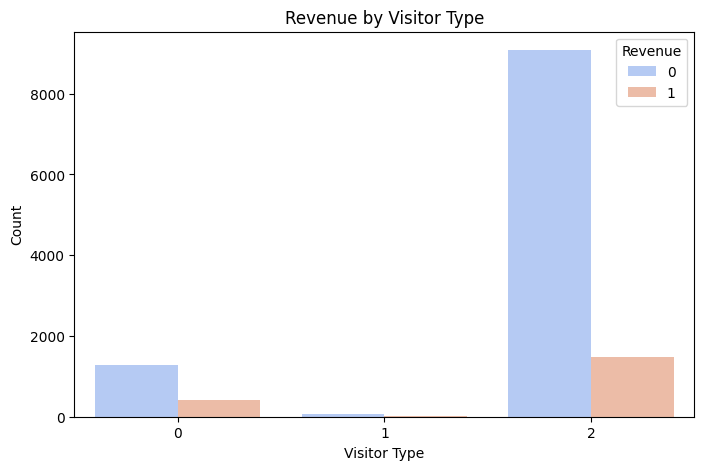

In [115]:
# 5. Revenue by Visitor Type
plt.figure(figsize=(8, 5))
df['VisitorType_encoded'] = df['VisitorType'].astype('category').cat.codes
sns.countplot(x='VisitorType_encoded', hue='Revenue', data=df, palette='coolwarm')
plt.title('Revenue by Visitor Type')
plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.legend(title='Revenue', loc='upper right')
plt.show()

* VisitorType = 1 would mean that the visitor is a returning visitor.
* VisitorType = 0 would mean that the visitor is a new visitor.

From the above countplot we can conclude that New visitors count is more than Return visitors.

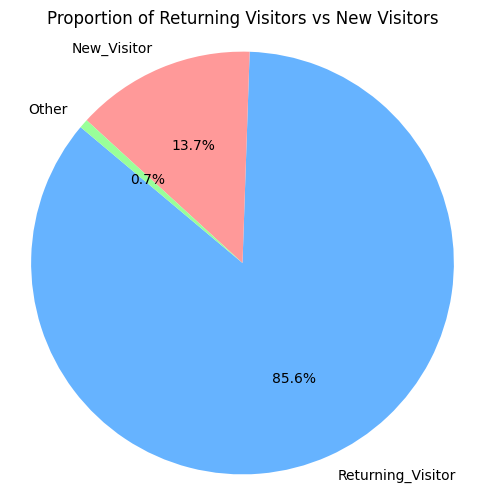

In [153]:
# Count the occurrences of each visitor type
visitor_counts = df['VisitorType'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(visitor_counts, labels=visitor_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999','#99ff99'])
plt.title('Proportion of Returning Visitors vs New Visitors')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

They need to increase their sales with the existing customers, because the data shows Returning Visitors are more than New Vistors, others.

###   1.Model Development for Purchase Likelihood Prediction

In [154]:
le = LabelEncoder()
df['Month'] = le.fit_transform(df['Month'])
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

In [155]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,0,0


In [156]:
# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['Administrative', 'Administrative_Duration', 'Informational',
                      'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                      'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [157]:
# Define features and target variable for purchase likelihood prediction
X_purchase = df.drop(columns=['Revenue'])
y_purchase = df['Revenue']

In [158]:
# Split the data into training and testing sets
X_train_purchase, X_test_purchase, y_train_purchase, y_test_purchase = train_test_split(X_purchase, y_purchase, test_size=0.2, random_state=42)

In [159]:
# Train a logistic regression model
model_purchase = LogisticRegression(max_iter=1000, random_state=42)
model_purchase.fit(X_train_purchase, y_train_purchase)

LogisticRegression(max_iter=1000, random_state=42)

In [160]:
# Predict on the test set
y_pred_purchase = model_purchase.predict(X_test_purchase)
y_prob_purchase = model_purchase.predict_proba(X_test_purchase)[:, 1]

In [161]:
# Evaluate the model
accuracy_purchase = accuracy_score(y_test_purchase, y_pred_purchase)
roc_auc_purchase = roc_auc_score(y_test_purchase, y_prob_purchase)
classification_report_purchase = classification_report(y_test_purchase, y_pred_purchase)

In [162]:
print("Purchase Likelihood Prediction")
print(f"Accuracy: {accuracy_purchase}")
print(f"ROC AUC: {roc_auc_purchase}")
print("Classification Report:")
print(classification_report_purchase)

Purchase Likelihood Prediction
Accuracy: 0.8690186536901865
ROC AUC: 0.8781181735841014
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.93      2055
           1       0.73      0.34      0.47       411

    accuracy                           0.87      2466
   macro avg       0.80      0.66      0.70      2466
weighted avg       0.86      0.87      0.85      2466



Here the Accuracy and ROC AUC scores for Purchase LikeliHood Prediction are almost 87%.

### 2.Model Development for Customer Return Prediction

In [163]:
# Define features and target variable for customer return prediction
X_return = df.drop(columns=['VisitorType'])
y_return = df['VisitorType']

In [164]:
# Split the data into training and testing sets
X_train_return, X_test_return, y_train_return, y_test_return = train_test_split(X_return, y_return, test_size=0.2, random_state=42)

In [165]:
# Train a logistic regression model
model_return = LogisticRegression(max_iter=1000, random_state=42)
model_return.fit(X_train_return, y_train_return)

LogisticRegression(max_iter=1000, random_state=42)

In [166]:
# Predict on the test set
y_pred_return = model_return.predict(X_test_return)
y_prob_return = model_return.predict_proba(X_test_return)

In [167]:
# Evaluate the model
accuracy_return = accuracy_score(y_test_return, y_pred_return)
roc_auc_return = roc_auc_score(y_test_return, y_prob_return, multi_class='ovr')
classification_report_return = classification_report(y_test_return, y_pred_return)

In [168]:
print("Customer Return Prediction")
print(f"Accuracy: {accuracy_return}")
print(f"ROC AUC: {roc_auc_return}")
print("Classification Report:")
print(classification_report_return)

Customer Return Prediction
Accuracy: 0.8600973236009732
ROC AUC: 0.8556906984244529
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.06      0.11       344
           1       1.00      0.50      0.67        10
           2       0.86      0.99      0.92      2112

    accuracy                           0.86      2466
   macro avg       0.81      0.52      0.57      2466
weighted avg       0.82      0.86      0.81      2466



 The Accuracy and ROC AUC scores for the Customer Return Prediction are 86% and 85%.

### 3. Buliding a Product Recommendation System

To Recommend the suitable products based on their purchase history a recommendation system is needed so for that some features are required like "UserID", "ProductID" and Revenue, since in our dataset we are already have of those feature is 'Revenue' and other 2 feautes are extracted with help of feature engineering, so inorder make those columns we simply merge the two features which are already existed like 'visitorType' & 'Month' for 'UserID' and 'ProductRelated' & 'ProductRelated_Duration' for 'ProductID'.

In [172]:
# Generate a UserID and ProductID (example approach, you might need actual data)
df['UserID'] = df.groupby(['VisitorType', 'Month']).ngroup()
df['ProductID'] = df.groupby(['ProductRelated', 'ProductRelated_Duration']).ngroup()

In [173]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,UserID,ProductID
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2,1,1,1,1,2,0,0,15,1
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,2,2,2,1,2,2,0,0,15,177
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2,4,1,9,3,2,0,0,15,1
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,2,3,2,2,4,2,0,0,15,62
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,2,3,3,1,4,2,1,0,15,2894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,-0.310366,-0.288966,0.342125,-0.308821,1,4,6,1,1,2,1,0,14,9049
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,-0.457683,-0.447364,-0.317178,-0.308821,7,3,2,1,8,2,1,0,20,1198
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,1.261014,0.897093,-0.317178,-0.308821,7,3,2,1,13,2,1,0,20,1436
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,-0.457683,-0.453140,-0.317178,-0.308821,7,2,2,3,11,2,0,0,20,4176


In [181]:
df[['Revenue', 'UserID', 'ProductID']]

,Revenue,UserID,ProductID
0,0,15,1
1,0,15,177
2,0,15,1
3,0,15,62
4,0,15,2894
...,...,...,...
12325,0,14,9049
12326,0,20,1198
12327,0,20,1436
12328,0,20,4176


In [174]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

In [175]:
# Aggregating data to ensure unique UserID and ProductID pairs
df_aggregated = df.groupby(['UserID', 'ProductID']).agg({'Revenue': 'sum'}).reset_index()

In [176]:
# Creating a user-item interaction matrix
interaction_matrix = df_aggregated.pivot(index='UserID', columns='ProductID', values='Revenue').fillna(0)
interaction_matrix = csr_matrix(interaction_matrix.values)

In [177]:
# Compute cosine similarity between users
user_similarity = cosine_similarity(interaction_matrix)

This function essentially performs collaborative filtering to recommend products. It identifies the most similar users to the given user based on a similarity matrix, aggregates their product interactions, and recommends the top products that these similar users have interacted with the most.

In [178]:
# Function to get recommendations for a user
def get_recommendations(user_id, interaction_matrix, user_similarity, n_recommendations=5):
    user_index = data_aggregated['UserID'].unique().tolist().index(user_id)
    similar_users = user_similarity[user_index]
    
    # Get the indices of the most similar users
    similar_user_indices = similar_users.argsort()[::-1][1:]
    
    # Get products purchased by the similar users
    similar_users_purchases = interaction_matrix[similar_user_indices].toarray()
    
    # Sum the interactions of similar users
    product_scores = similar_users_purchases.sum(axis=0)
    
    # Get product indices sorted by score
    recommended_product_indices = product_scores.argsort()[::-1][:n_recommendations]
    
    # Map indices back to product IDs
    recommended_product_ids = [data_aggregated['ProductID'].unique()[i] for i in recommended_product_indices]
    
    return recommended_product_ids


In [187]:
user_id = 7  # Specify the user for whom recommendations are needed
recommended_products = get_recommendations(user_id, interaction_matrix, user_similarity)
print("Recommended Products for User {}: {}".format(user_id, recommended_products))

Recommended Products for User 7: [79, 61, 1636, 10834, 10997]


Here the recommendations for the provided user ID !

Thank you !

Adapa Ajay Kumar

adapaajaykumar1148@gmail.com